# SVM

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('guardian_cleaned_dataset.csv')

# Display the first 5 rows
df.head()

,id,headline,section,publication_date,url,author,keywords,body_text,sentiment
0,politics/2025/feb/03/most-zero-hours-workers-w...,most zero-hours workers ‘with same employer fo...,Politics,2025-02-03T00:07:24Z,https://www.theguardian.com/politics/2025/feb/...,Gwyn Topham,"Trade unions, Zero-hours contracts, Employment...",hundreds thousands british workers zerohours c...,0.333333
1,politics/2025/feb/02/starmer-calls-on-european...,starmer calls on european leaders to put more ...,Politics,2025-02-02T22:30:23Z,https://www.theguardian.com/politics/2025/feb/...,Rowena Mason,"Foreign policy, Defence policy, Keir Starmer, ...",keir starmer called european leaders economic ...,0.233333
2,politics/2025/feb/02/keir-starmer-european-def...,keir starmer to discuss european defence with ...,Politics,2025-02-02T19:00:18Z,https://www.theguardian.com/politics/2025/feb/...,Jennifer Rankin in Brussels and Rowena Mason,"Defence policy, Foreign policy, Keir Starmer, ...",keir starmers hopes defence security pact risk...,0.000000
3,politics/2025/feb/02/cooper-defends-starmer-af...,cooper defends starmer after book says chief o...,Politics,2025-02-02T18:44:23Z,https://www.theguardian.com/politics/2025/feb/...,Rowena Mason Whitehall editor,"Keir Starmer, Morgan McSweeney, Yvette Cooper,...",keir starmers cabinet ministers said stands re...,0.000000
4,politics/2025/feb/02/eluned-morgan-south-wales...,‘reform is a challenge’: eluned morgan hits so...,Politics,2025-02-02T16:00:14Z,https://www.theguardian.com/politics/2025/feb/...,Steven Morris,"Eluned Morgan, Wales, Welsh politics, Labour, ...",welsh parliament elections year away minister ...,0.000000


In [ ]:
print(df.columns)

Index(['id', 'headline', 'section', 'publication_date', 'url', 'author',
       'keywords', 'body_text', 'sentiment'],
      dtype='object')


In [ ]:
def categorize_sentiment(s):
    if s > 0:
        return "Positive"
    elif s < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment_label'] = df['sentiment'].apply(categorize_sentiment)

# Now define Features and Target
X = df.drop(['sentiment', 'sentiment_label'], axis=1)  # Features
y = df['sentiment_label']                             # Target

# Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

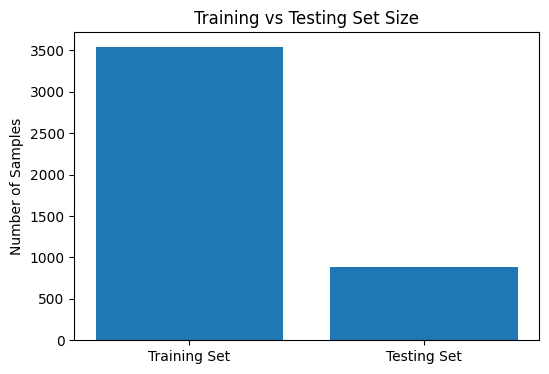


Training Set Sample:


,id,headline,section,publication_date,url,author,keywords,body_text
3375,education/article/2024/jun/11/media-studies-po...,"media studies are popular, dynamic and have ‘p...",Education,2024-06-10T23:01:27Z,https://www.theguardian.com/education/article/...,Sally Weale Education correspondent,"Universities, Education, Higher education, UK ...",media communications studies derided soft lowv...
3797,culture/2024/sep/22/fire-dancers-bring-flames-...,fire dancers bring flames and flow to adelaide,Culture,2024-09-22T02:38:41Z,https://www.theguardian.com/culture/2024/sep/2...,Tory Shepherd,"Festivals, Dance, Culture, Māori, Adelaide, Au...",flames twirl dark gothic tribal pagan punk emp...
1803,sport/2025/jan/13/jack-draper-survives-scare-i...,jack draper survives huge first-round scare in...,Sport,2025-01-13T18:24:28Z,https://www.theguardian.com/sport/2025/jan/13/...,Tumaini Carayol at Melbourne Park,"Australian Open 2025, Jack Draper, Australian ...",trailing sets fourth set uncomfortable frustra...
4216,world/2025/jan/19/gaza-fighting-ceasefire-dela...,gaza ceasefire begins with release of three is...,World news,2025-01-19T19:58:48Z,https://www.theguardian.com/world/2025/jan/19/...,"Lorenzo Tondo in Jerusalem, Bethan McKernan in...","Israel-Gaza war, Israel, Gaza, Middle East and...",israel hamas begun longawaited ceasefire gaza ...
2166,technology/2024/dec/30/dating-apps-prepare-to-...,dating apps prepare to launch ai features to h...,Technology,2024-12-30T13:46:59Z,https://www.theguardian.com/technology/2024/de...,Raphael Boyd,"Technology, Social media, Apps, Dating, Life a...",fed writing dating profiles sick tired swiping...


In [ ]:
# Visualize the size of splits
import matplotlib.pyplot as plt

sizes = [len(X_train), len(X_test)]
labels = ['Training Set', 'Testing Set']

plt.figure(figsize=(6,4))
plt.bar(labels, sizes)
plt.title('Training vs Testing Set Size')
plt.ylabel('Number of Samples')
plt.show()

# Show a small sample of the training and testing data
print("\nTraining Set Sample:")
X_train.head()

In [ ]:
print("\nTesting Set Sample:")
X_test.head()


Testing Set Sample:


,id,headline,section,publication_date,url,author,keywords,body_text
2945,environment/2024/nov/25/support-rewilding-to-s...,support rewilding to save scotland’s natural r...,Environment,2024-11-25T17:17:25Z,https://www.theguardian.com/environment/2024/n...,NaN,"Rewilding, Scotland, Environment, UK news, Dundee",scotland places love dundee grew shetland film...
3786,culture/2024/sep/24/seth-meyers-trump-vance,seth meyers on being trump’s vp pick: ‘you hav...,Culture,2024-09-24T14:57:58Z,https://www.theguardian.com/culture/2024/sep/2...,Guardian staff,"Late-night TV roundup, Seth Meyers, Culture, T...",latenight hosts discussed fallout controversia...
4281,world/2025/jan/16/families-hostages-gaza-agony...,families of hostages held in gaza say they are...,World news,2025-01-16T18:59:16Z,https://www.theguardian.com/world/2025/jan/16/...,Emine Sinmaz and Bethan McKernan,"Israel-Gaza war, Israel, Gaza, Hamas, Palestin...",families hostages held gaza said delays ceasef...
633,business/2025/jan/21/hospitality-firms-to-incu...,hospitality firms ‘to incur £1bn costs from em...,Business,2025-01-21T00:01:00Z,https://www.theguardian.com/business/2025/jan/...,Sarah Butler,"Hospitality industry, Food & drink industry, B...",hospitality industry incur extra bn costs work...
2552,environment/2025/jan/26/mystified-by-sercos-mi...,mystified by serco’s mission statement,Environment,2025-01-26T17:04:55Z,https://www.theguardian.com/environment/2025/j...,NaN,"Just Stop Oil, Protest, Serco, Environment, Ed...",report extension gaie delaps prison term unlaw...


Feature Engineering and Encoding for SVM

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np

# Select relevant features for SVM
selected_features = ['headline', 'body_text', 'keywords']  # You can add 'author' if you want

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Fill NaN values in text fields with empty string
X_train_selected = X_train_selected.fillna('')
X_test_selected = X_test_selected.fillna('')

# Build a pipeline for text vectorization using TF-IDF
text_features = selected_features

text_transformer = ColumnTransformer(
    transformers=[
        (feature, TfidfVectorizer(max_features=500), feature) for feature in text_features
    ],
    remainder='drop'
)

# Fit the transformer on the training set and transform both train and test
X_train_vectorized = text_transformer.fit_transform(X_train_selected)
X_test_vectorized = text_transformer.transform(X_test_selected)

print("Vectorized Training Set Shape:", X_train_vectorized.shape)
print("Vectorized Testing Set Shape:", X_test_vectorized.shape)


Vectorized Training Set Shape: (3540, 1500)
Vectorized Testing Set Shape: (885, 1500)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train (fit) the SVM
svm_model.fit(X_train_vectorized, y_train)

# Predict on the testing set
y_pred = svm_model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

Test Set Accuracy: 0.6508


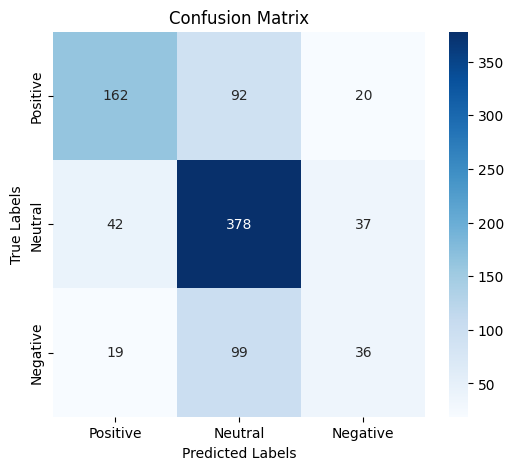

Classification Report:
               precision    recall  f1-score   support

    Positive       0.39      0.23      0.29       154
     Neutral       0.66      0.83      0.74       457
    Negative       0.73      0.59      0.65       274

    accuracy                           0.65       885
   macro avg       0.59      0.55      0.56       885
weighted avg       0.64      0.65      0.63       885



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["Positive", "Neutral", "Negative"])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Positive", "Neutral", "Negative"], yticklabels=["Positive", "Neutral", "Negative"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=["Positive", "Neutral", "Negative"])
print("Classification Report:\n", report)



Kernel: linear | C=0.1
Accuracy: 0.6328


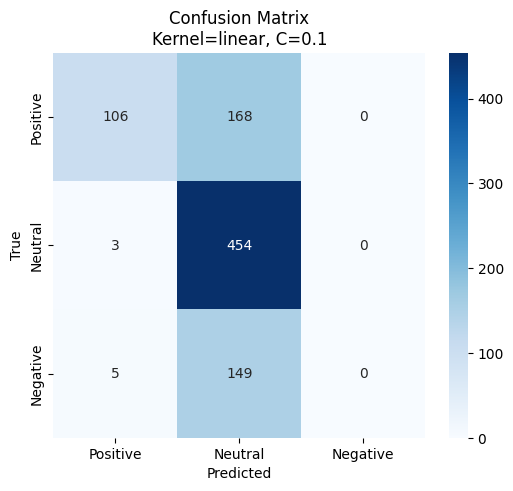

Classification Report:
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00       154
     Neutral       0.59      0.99      0.74       457
    Negative       0.93      0.39      0.55       274

    accuracy                           0.63       885
   macro avg       0.51      0.46      0.43       885
weighted avg       0.59      0.63      0.55       885


Kernel: linear | C=1


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6508


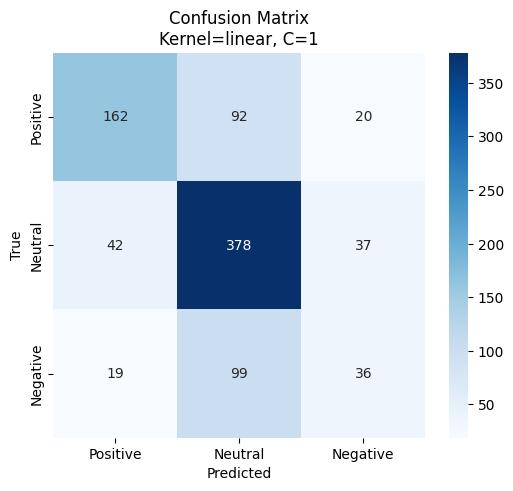

Classification Report:
              precision    recall  f1-score   support

    Positive       0.39      0.23      0.29       154
     Neutral       0.66      0.83      0.74       457
    Negative       0.73      0.59      0.65       274

    accuracy                           0.65       885
   macro avg       0.59      0.55      0.56       885
weighted avg       0.64      0.65      0.63       885


Kernel: linear | C=10
Accuracy: 0.5571


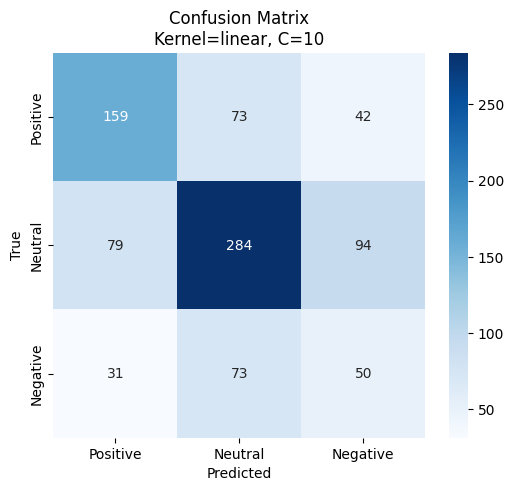

Classification Report:
              precision    recall  f1-score   support

    Positive       0.27      0.32      0.29       154
     Neutral       0.66      0.62      0.64       457
    Negative       0.59      0.58      0.59       274

    accuracy                           0.56       885
   macro avg       0.51      0.51      0.51       885
weighted avg       0.57      0.56      0.56       885


Kernel: rbf | C=0.1
Accuracy: 0.5164


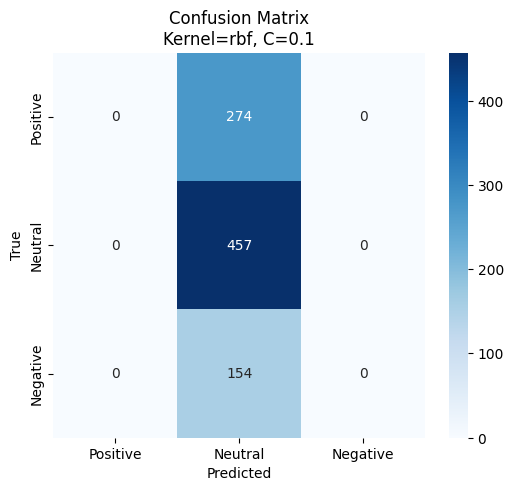

Classification Report:
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00       154
     Neutral       0.52      1.00      0.68       457
    Negative       0.00      0.00      0.00       274

    accuracy                           0.52       885
   macro avg       0.17      0.33      0.23       885
weighted avg       0.27      0.52      0.35       885


Kernel: rbf | C=1


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6475


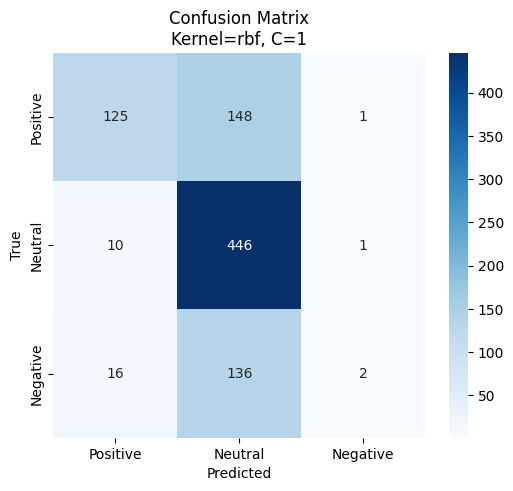

Classification Report:
              precision    recall  f1-score   support

    Positive       0.50      0.01      0.03       154
     Neutral       0.61      0.98      0.75       457
    Negative       0.83      0.46      0.59       274

    accuracy                           0.65       885
   macro avg       0.65      0.48      0.46       885
weighted avg       0.66      0.65      0.57       885


Kernel: rbf | C=10
Accuracy: 0.6667


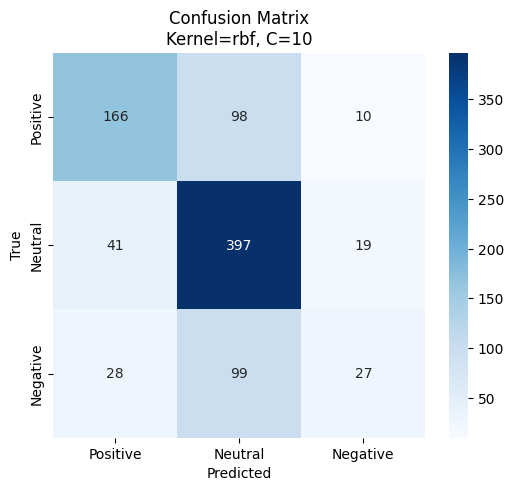

Classification Report:
              precision    recall  f1-score   support

    Positive       0.48      0.18      0.26       154
     Neutral       0.67      0.87      0.76       457
    Negative       0.71      0.61      0.65       274

    accuracy                           0.67       885
   macro avg       0.62      0.55      0.55       885
weighted avg       0.65      0.67      0.64       885


Kernel: poly | C=0.1
Accuracy: 0.5164


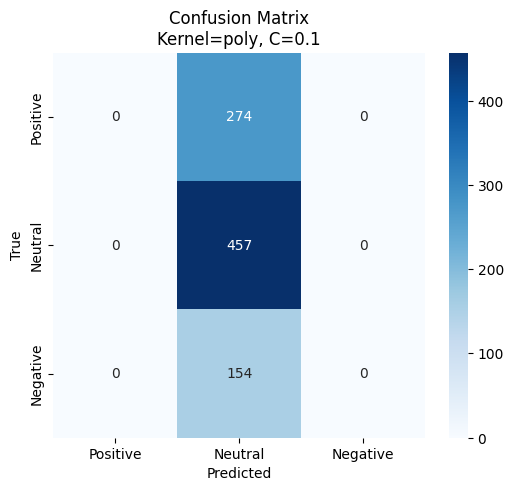

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00       154
     Neutral       0.52      1.00      0.68       457
    Negative       0.00      0.00      0.00       274

    accuracy                           0.52       885
   macro avg       0.17      0.33      0.23       885
weighted avg       0.27      0.52      0.35       885


Kernel: poly | C=1
Accuracy: 0.5763


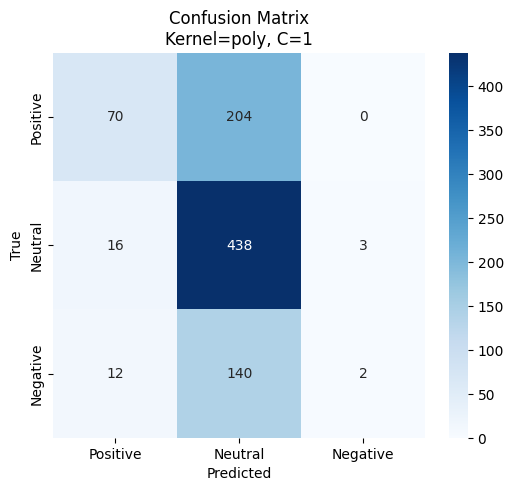

Classification Report:
              precision    recall  f1-score   support

    Positive       0.40      0.01      0.03       154
     Neutral       0.56      0.96      0.71       457
    Negative       0.71      0.26      0.38       274

    accuracy                           0.58       885
   macro avg       0.56      0.41      0.37       885
weighted avg       0.58      0.58      0.49       885


Kernel: poly | C=10
Accuracy: 0.6000


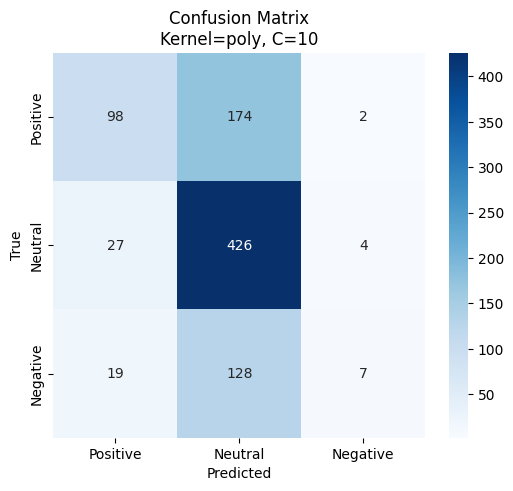

Classification Report:
              precision    recall  f1-score   support

    Positive       0.54      0.05      0.08       154
     Neutral       0.59      0.93      0.72       457
    Negative       0.68      0.36      0.47       274

    accuracy                           0.60       885
   macro avg       0.60      0.45      0.42       885
weighted avg       0.61      0.60      0.53       885



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define kernels and cost values to try
kernels = ['linear', 'rbf', 'poly']
C_values = [0.1, 1, 10]

# Labels for confusion matrix
labels_list = ["Positive", "Neutral", "Negative"]

for kernel in kernels:
    for c in C_values:
        print(f"\nKernel: {kernel} | C={c}")

        # Train the model
        model = SVC(kernel=kernel, C=c, random_state=42)
        model.fit(X_train_vectorized, y_train)

        # Predict
        y_pred = model.predict(X_test_vectorized)

        # Accuracy
        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {acc:.4f}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred, labels=labels_list)
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_list, yticklabels=labels_list)
        plt.title(f'Confusion Matrix\nKernel={kernel}, C={c}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Classification Report
        cr = classification_report(y_test, y_pred, target_names=labels_list)
        print(f"Classification Report:\n{cr}")


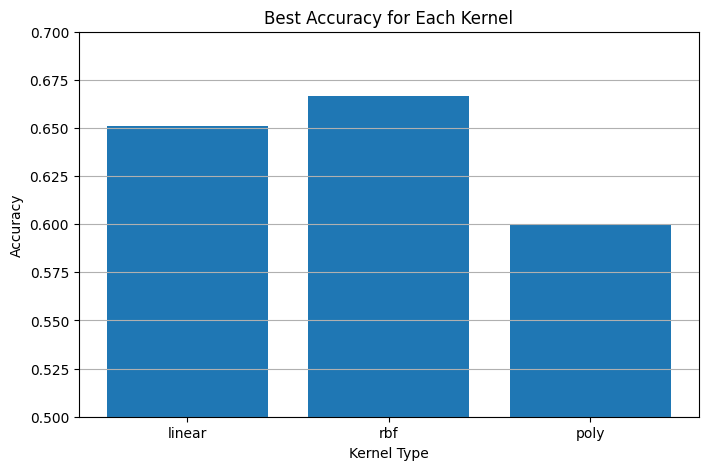

In [ ]:
import matplotlib.pyplot as plt

kernels = ['linear', 'rbf', 'poly']
best_accuracies = [0.6508, 0.6667, 0.6000]  # from your results

plt.figure(figsize=(8,5))
plt.bar(kernels, best_accuracies)
plt.title('Best Accuracy for Each Kernel')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.ylim(0.5, 0.7)
plt.grid(axis='y')
plt.show()


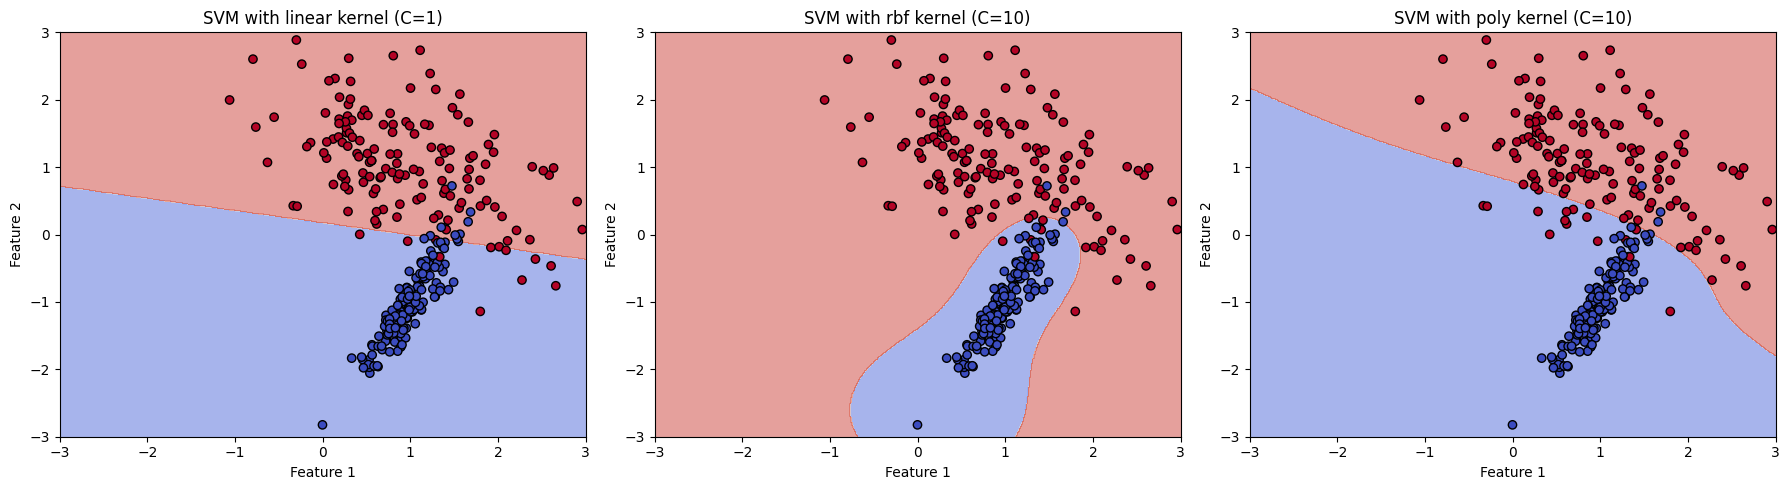

In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Create a simple 2D dataset
X_vis, y_vis = make_classification(
    n_samples=300, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)

# Define kernels to visualize
kernels = ['linear', 'rbf', 'poly']
C_best = {'linear': 1, 'rbf': 10, 'poly': 10}  # best C values based on your earlier results

fig, axs = plt.subplots(1, 3, figsize=(18,5))

for idx, kernel in enumerate(kernels):
    model = SVC(kernel=kernel, C=C_best[kernel], random_state=42)
    model.fit(X_vis, y_vis)

    ax = axs[idx]

    # Plot decision boundary
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    ax.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap='coolwarm', edgecolors='k')
    ax.set_title(f"SVM with {kernel} kernel (C={C_best[kernel]})")
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


# Ensemble learning

In [ ]:
# Confirming shape of existing data
print("Training Feature Set Shape:", X_train_vectorized.shape)
print("Testing Feature Set Shape:", X_test_vectorized.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Feature Set Shape: (3540, 1500)
Testing Feature Set Shape: (885, 1500)
Training Labels Shape: (3540,)
Testing Labels Shape: (885,)


Train the Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest
rf_model.fit(X_train_vectorized, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_vectorized)

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Set Accuracy: {accuracy_rf:.4f}")

Random Forest Test Set Accuracy: 0.6576


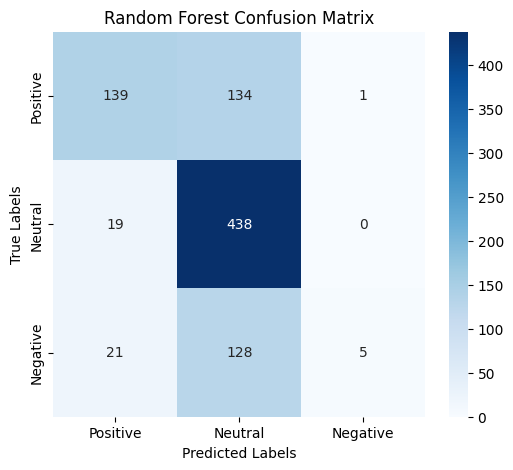

Random Forest Classification Report:
               precision    recall  f1-score   support

    Positive       0.83      0.03      0.06       154
     Neutral       0.63      0.96      0.76       457
    Negative       0.78      0.51      0.61       274

    accuracy                           0.66       885
   macro avg       0.75      0.50      0.48       885
weighted avg       0.71      0.66      0.59       885



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=["Positive", "Neutral", "Negative"])

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["Positive", "Neutral", "Negative"], yticklabels=["Positive", "Neutral", "Negative"])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
report_rf = classification_report(y_test, y_pred_rf, target_names=["Positive", "Neutral", "Negative"])
print("Random Forest Classification Report:\n", report_rf)
